# Project Title
## Computational social media- Project
### Saeed Rad, Evgeniy Chervonenko, Valentine Santarelli

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from functools import reduce
import operator 
import matplotlib.pyplot as plt
%matplotlib inline


# Exploring dataset
50 k tweets geolocalised in Lausanne

## Overview

In [2]:
# load json twitter data
data= pd.read_json('../data/lausanne_50K.json',typ='frame',lines=True)
data.head()

,_id,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,source,text,timestamp_ms,truncated,user
0,{'$oid': '55b932fd0a1776527f627ec2'},NaN,None,2015-07-29 20:09:32,NaN,"{'symbols': [], 'user_mentions': [], 'trends':...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Flemme de me préparer,2015-07-29 20:09:32.554,False,"{'follow_request_sent': None, 'profile_use_bac..."
1,{'$oid': '55b9720c0a1776527f628c28'},NaN,None,2015-07-30 00:38:35,NaN,"{'user_mentions': [], 'symbols': [], 'trends':...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Trop hâte d'aller à Zurich,2015-07-30 00:38:35.304,False,"{'follow_request_sent': None, 'profile_use_bac..."
2,{'$oid': '55b9730c0a1776527f628c3b'},NaN,None,2015-07-30 00:42:51,NaN,"{'symbols': [], 'user_mentions': [], 'trends':...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",mais accidentellement il ajouta a cette mixtur...,2015-07-30 00:42:51.603,False,"{'follow_request_sent': None, 'profile_use_bac..."
3,{'$oid': '55bbca590a1776527f62dacc'},NaN,None,2015-07-31 19:19:53,NaN,"{'user_mentions': [{'indices': [0, 12], 'id_st...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",@sansplomb99 lui a payé en effet 😁,2015-07-31 19:19:53.202,False,"{'follow_request_sent': None, 'profile_use_bac..."
4,{'$oid': '55bc9c8e0a1776527f62ee4a'},NaN,None,2015-08-01 10:16:45,NaN,"{'symbols': [], 'user_mentions': [], 'trends':...",NaN,NaN,0,False,...,"{'contributors': None, 'truncated': False, 'te...",{'$numberLong': '627406966093164544'},6.274070e+17,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Holaaa Argentinaa!! Ya terminó la clase y estu...,2015-08-01 10:16:45.789,False,"{'follow_request_sent': None, 'profile_use_bac..."


In [3]:
data.columns

Index(['_id', 'contributors', 'coordinates', 'created_at',
       'display_text_range', 'entities', 'extended_entities', 'extended_tweet',
       'favorite_count', 'favorited', 'filter_level', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'quoted_status', 'quoted_status_id',
       'quoted_status_id_str', 'retweet_count', 'retweeted', 'source', 'text',
       'timestamp_ms', 'truncated', 'user'],
      dtype='object')

### User's info

In [4]:
data['user'][0]

{'contributors_enabled': False,
 'created_at': 'Mon May 21 17:37:48 +0000 2012',
 'default_profile': True,
 'default_profile_image': False,
 'description': 'Insta: melo_km',
 'favourites_count': 380,
 'follow_request_sent': None,
 'followers_count': 163,
 'following': None,
 'friends_count': 65,
 'geo_enabled': True,
 'id': 586804968,
 'id_str': '586804968',
 'is_translator': False,
 'lang': 'fr',
 'listed_count': 1,
 'location': 'Brooklyn, NYC',
 'name': 'km',
 'notifications': None,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,
 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/586804968/1436931020',
 'profile_image_url': 'http://pbs.twimg.com/profile_images/622993756371963905/qr67mz-D_normal.jpg',
 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/62299375

### Cleaning and Extracting useful variable from dict

In [5]:

data['created_at']= pd.to_datetime(data['created_at'])
data['tweet_id']=data['_id'].map(lambda x: x['$oid'])
data['hashtags']=data['entities'].map(lambda x: x['hashtags'])
data['hashtags']= data['hashtags'].map(lambda x: [xi['text'].lower() for xi in x] if x != [] else np.nan)
data['user_id']=data['user'].map(lambda x: x['id'])
data['user_id']=data['user_id'].map(lambda x: x['$numberLong'] if isinstance(x,dict) else x)
data['user_lang']=data['user'].map(lambda x: x['lang'])
data['user_location']=data['user'].map(lambda x: x['location'])
data['user_location']= data['user_location'].map(lambda x: x.lower() if isinstance(x, str) else np.nan)




In [6]:
data.head(100)

,_id,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,...,source,text,timestamp_ms,truncated,user,tweet_id,hashtags,user_id,user_lang,user_location
0,{'$oid': '55b932fd0a1776527f627ec2'},NaN,None,2015-07-29 20:09:32,NaN,"{'symbols': [], 'user_mentions': [], 'trends':...",NaN,NaN,0,False,...,"<a href=""http://twitter.com/download/iphone"" r...",Flemme de me préparer,2015-07-29 20:09:32.554,False,"{'follow_request_sent': None, 'profile_use_bac...",55b932fd0a1776527f627ec2,NaN,586804968,fr,"brooklyn, nyc"
1,{'$oid': '55b9720c0a1776527f628c28'},NaN,None,2015-07-30 00:38:35,NaN,"{'user_mentions': [], 'symbols': [], 'trends':...",NaN,NaN,0,False,...,"<a href=""http://twitter.com/download/iphone"" r...",Trop hâte d'aller à Zurich,2015-07-30 00:38:35.304,False,"{'follow_request_sent': None, 'profile_use_bac...",55b9720c0a1776527f628c28,NaN,569876210,fr,titrite
2,{'$oid': '55b9730c0a1776527f628c3b'},NaN,None,2015-07-30 00:42:51,NaN,"{'symbols': [], 'user_mentions': [], 'trends':...",NaN,NaN,0,False,...,"<a href=""http://twitter.com/download/iphone"" r...",mais accidentellement il ajouta a cette mixtur...,2015-07-30 00:42:51.603,False,"{'follow_request_sent': None, 'profile_use_bac...",55b9730c0a1776527f628c3b,NaN,569876210,fr,titrite
3,{'$oid': '55bbca590a1776527f62dacc'},NaN,None,2015-07-31 19:19:53,NaN,"{'user_mentions': [{'indices': [0, 12], 'id_st...",NaN,NaN,0,False,...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",@sansplomb99 lui a payé en effet 😁,2015-07-31 19:19:53.202,False,"{'follow_request_sent': None, 'profile_use_bac...",55bbca590a1776527f62dacc,NaN,716221184,fr,genève - paris - london
4,{'$oid': '55bc9c8e0a1776527f62ee4a'},NaN,None,2015-08-01 10:16:45,NaN,"{'symbols': [], 'user_mentions': [], 'trends':...",NaN,NaN,0,False,...,"<a href=""http://twitter.com/download/iphone"" r...",Holaaa Argentinaa!! Ya terminó la clase y estu...,2015-08-01 10:16:45.789,False,"{'follow_request_sent': None, 'profile_use_bac...",55bc9c8e0a1776527f62ee4a,NaN,34885337,fr,venezuela - switzerland
5,{'$oid': '55c000860a1776527f63594e'},NaN,"{'type': 'Point', 'coordinates': [6.6335, 46.5...",2015-08-04 00:00:05,NaN,"{'symbols': [], 'user_mentions': [], 'trends':...",NaN,NaN,0,False,...,"<a href=""http://www.map-game.com"" rel=""nofollo...",Can you find Lausanne on the map? Just try it ...,2015-08-04 00:00:05.669,False,"{'follow_request_sent': None, 'profile_use_bac...",55c000860a1776527f63594e,[lausanne],163590921,en,
6,{'$oid': '55c0cde80a1776527f636b51'},NaN,None,2015-08-04 14:36:22,NaN,"{'symbols': [], 'user_mentions': [{'indices': ...",NaN,NaN,0,False,...,"<a href=""http://twitter.com/download/iphone"" r...",@tem_xi مافهمت,2015-08-04 14:36:22.905,False,"{'follow_request_sent': None, 'profile_use_bac...",55c0cde80a1776527f636b51,NaN,223923585,en,"manchester united , germany"
7,{'$oid': '55c26f1e0a1776527f63ac60'},NaN,None,2015-08-05 20:16:30,NaN,"{'symbols': [], 'user_mentions': [], 'trends':...",NaN,NaN,0,False,...,"<a href=""http://twitter.com/download/iphone"" r...",Fangirl is Life,2015-08-05 20:16:30.230,False,"{'follow_request_sent': None, 'profile_use_bac...",55c26f1e0a1776527f63ac60,NaN,3257132483,fr,1/5 + maz | d-45
8,{'$oid': '55c272820a1776527f63ad53'},NaN,None,2015-08-05 20:30:57,NaN,"{'user_mentions': [{'indices': [38, 53], 'scre...",NaN,NaN,0,False,...,"<a href=""http://twitter.com/download/iphone"" r...",Hahahahahah Mike t'es un ouuuuf 😂😂😂😂😂 @mrfligh...,2015-08-05 20:30:57.063,False,"{'follow_request_sent': None, 'profile_use_bac...",55c272820a1776527f63ad53,[wakeupman],113466470,fr,"lausanne, switzerland"
9,{'$oid': '55c290140a1776527f63b45b'},NaN,None,2015-08-05 22:37:07,NaN,"{'symbols': [], 'user_mentions': [], 'trends':...",NaN,NaN,0,False,...,"<a href=""http://twitter.com/download/iphone"" r...",اواه لو تدرين عن بعض الحنين و الشرق لامنه تجبر...,2015-08-05 22:37:07.962,False,"{'follow_request_sent': None, 'profile_use_bac...",55c290140a1776527f63

In [7]:
data.columns

Index(['_id', 'contributors', 'coordinates', 'created_at',
       'display_text_range', 'entities', 'extended_entities', 'extended_tweet',
       'favorite_count', 'favorited', 'filter_level', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'quoted_status', 'quoted_status_id',
       'quoted_status_id_str', 'retweet_count', 'retweeted', 'source', 'text',
       'timestamp_ms', 'truncated', 'user', 'tweet_id', 'hashtags', 'user_id',
       'user_lang', 'user_location'],
      dtype='object')

In [8]:
'''
sample200=data.sample(n=200)
sample200.head()
sample200.to_csv('sampe200tweets.csv')
'''

"\nsample200=data.sample(n=200)\nsample200.head()\nsample200.to_csv('sampe200tweets.csv')\n"

### Hashtags

In [9]:
data['has_hahstags'] = ~data['hashtags'].isnull()
data['nb_hahstags'] = data['hashtags'].apply(lambda x: len(x) if isinstance(x,list) else 0)
data.head()

,_id,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,...,timestamp_ms,truncated,user,tweet_id,hashtags,user_id,user_lang,user_location,has_hahstags,nb_hahstags
0,{'$oid': '55b932fd0a1776527f627ec2'},NaN,None,2015-07-29 20:09:32,NaN,"{'symbols': [], 'user_mentions': [], 'trends':...",NaN,NaN,0,False,...,2015-07-29 20:09:32.554,False,"{'follow_request_sent': None, 'profile_use_bac...",55b932fd0a1776527f627ec2,NaN,586804968,fr,"brooklyn, nyc",False,0
1,{'$oid': '55b9720c0a1776527f628c28'},NaN,None,2015-07-30 00:38:35,NaN,"{'user_mentions': [], 'symbols': [], 'trends':...",NaN,NaN,0,False,...,2015-07-30 00:38:35.304,False,"{'follow_request_sent': None, 'profile_use_bac...",55b9720c0a1776527f628c28,NaN,569876210,fr,titrite,False,0
2,{'$oid': '55b9730c0a1776527f628c3b'},NaN,None,2015-07-30 00:42:51,NaN,"{'symbols': [], 'user_mentions': [], 'trends':...",NaN,NaN,0,False,...,2015-07-30 00:42:51.603,False,"{'follow_request_sent': None, 'profile_use_bac...",55b9730c0a1776527f628c3b,NaN,569876210,fr,titrite,False,0
3,{'$oid': '55bbca590a1776527f62dacc'},NaN,None,2015-07-31 19:19:53,NaN,"{'user_mentions': [{'indices': [0, 12], 'id_st...",NaN,NaN,0,False,...,2015-07-31 19:19:53.202,False,"{'follow_request_sent': None, 'profile_use_bac...",55bbca590a1776527f62dacc,NaN,716221184,fr,genève - paris - london,False,0
4,{'$oid': '55bc9c8e0a1776527f62ee4a'},NaN,None,2015-08-01 10:16:45,NaN,"{'symbols': [], 'user_mentions': [], 'trends':...",NaN,NaN,0,False,...,2015-08-01 10:16:45.789,False,"{'follow_request_sent': None, 'profile_use_bac...",55bc9c8e0a1776527f62ee4a,NaN,34885337,fr,venezuela - switzerland,False,0


###  User languages

In [10]:
def ComputeFrequentUserLang(data):  
    #exclude tweet without hashtags
    user_lang=data[['tweet_id','user_lang']]
    user_lang = user_lang.groupby(by='user_lang').count().sort_values(by= 'tweet_id', ascending= True)
    user_lang=user_lang.rename(columns={'tweet_id':'count'})
    return user_lang.iloc[::-1]

frequent_user_lang=ComputeFrequentUserLang(data)
five_frequent_user_lang = frequent_user_lang.reset_index().head()
for i in five_frequent_user_lang['user_lang']:
    data['user_lang_{}'.format(i)]= data['user_lang']==i

data['ohter user lang']= [x not in five_frequent_user_lang['user_lang'] for x in data['user_lang']]
data.head()



,_id,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,...,user_lang,user_location,has_hahstags,nb_hahstags,user_lang_fr,user_lang_en,user_lang_de,user_lang_ar,user_lang_ja,ohter user lang
0,{'$oid': '55b932fd0a1776527f627ec2'},NaN,None,2015-07-29 20:09:32,NaN,"{'symbols': [], 'user_mentions': [], 'trends':...",NaN,NaN,0,False,...,fr,"brooklyn, nyc",False,0,True,False,False,False,False,True
1,{'$oid': '55b9720c0a1776527f628c28'},NaN,None,2015-07-30 00:38:35,NaN,"{'user_mentions': [], 'symbols': [], 'trends':...",NaN,NaN,0,False,...,fr,titrite,False,0,True,False,False,False,False,True
2,{'$oid': '55b9730c0a1776527f628c3b'},NaN,None,2015-07-30 00:42:51,NaN,"{'symbols': [], 'user_mentions': [], 'trends':...",NaN,NaN,0,False,...,fr,titrite,False,0,True,False,False,False,False,True
3,{'$oid': '55bbca590a1776527f62dacc'},NaN,None,2015-07-31 19:19:53,NaN,"{'user_mentions': [{'indices': [0, 12], 'id_st...",NaN,NaN,0,False,...,fr,genève - paris - london,False,0,True,False,False,False,False,True
4,{'$oid': '55bc9c8e0a1776527f62ee4a'},NaN,None,2015-08-01 10:16:45,NaN,"{'symbols': [], 'user_mentions': [], 'trends':...",NaN,NaN,0,False,...,fr,venezuela - switzerland,False,0,True,False,False,False,False,True


### Tweet languages

In [11]:
def ComputeFrequentTweetLang(data):  
    #exclude tweet without hashtags
    lang=data[['tweet_id','lang']]
    lang = lang.groupby(by='lang').count().sort_values(by= 'tweet_id', ascending= True)
    lang= lang.rename(columns={'tweet_id':'count'})
    return lang.iloc[::-1]

frequent_lang=ComputeFrequentTweetLang(data)
five_frequent_lang = frequent_lang.reset_index().head()
for i in five_frequent_lang['lang']:
    data['lang_{}'.format(i)]= data['lang']==i

data['ohter lang']= [x not in five_frequent_lang['lang'] for x in data['lang']]
data.head()

,_id,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,...,user_lang_de,user_lang_ar,user_lang_ja,ohter user lang,lang_fr,lang_en,lang_und,lang_es,lang_de,ohter lang
0,{'$oid': '55b932fd0a1776527f627ec2'},NaN,None,2015-07-29 20:09:32,NaN,"{'symbols': [], 'user_mentions': [], 'trends':...",NaN,NaN,0,False,...,False,False,False,True,True,False,False,False,False,True
1,{'$oid': '55b9720c0a1776527f628c28'},NaN,None,2015-07-30 00:38:35,NaN,"{'user_mentions': [], 'symbols': [], 'trends':...",NaN,NaN,0,False,...,False,False,False,True,True,False,False,False,False,True
2,{'$oid': '55b9730c0a1776527f628c3b'},NaN,None,2015-07-30 00:42:51,NaN,"{'symbols': [], 'user_mentions': [], 'trends':...",NaN,NaN,0,False,...,False,False,False,True,True,False,False,False,False,True
3,{'$oid': '55bbca590a1776527f62dacc'},NaN,None,2015-07-31 19:19:53,NaN,"{'user_mentions': [{'indices': [0, 12], 'id_st...",NaN,NaN,0,False,...,False,False,False,True,True,False,False,False,False,True
4,{'$oid': '55bc9c8e0a1776527f62ee4a'},NaN,None,2015-08-01 10:16:45,NaN,"{'symbols': [], 'user_mentions': [], 'trends':...",NaN,NaN,0,False,...,False,False,False,True,False,False,False,True,False,True


## Basic statistics

In [12]:
data.describe() #doesn't give anything

,contributors,favorite_count,id_str,in_reply_to_status_id_str,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,quoted_status_id_str,retweet_count,nb_hahstags
count,0.0,50000.0,5.000000e+04,1.634000e+04,1.927100e+04,49958.000000,20941.000000,3.810000e+03,50000.0,50000.000000
mean,NaN,0.0,7.649092e+17,7.656941e+17,4.957148e+16,0.076364,0.009598,7.596949e+17,0.0,0.503180
std,NaN,0.0,2.930100e+16,3.429869e+16,1.852219e+17,0.265583,0.097502,3.529139e+16,0.0,1.245271
min,NaN,0.0,6.264847e+17,2.401283e+10,8.412000e+03,0.000000,0.000000,3.194941e+17,0.0,0.000000
25%,NaN,0.0,7.374537e+17,7.375975e+17,1.547980e+08,0.000000,0.000000,7.367500e+17,0.0,0.000000
50%,NaN,0.0,7.673406e+17,7.715668e+17,5.573253e+08,0.000000,0.000000,7.576861e+17,0.0,0.000000
75%,NaN,0.0,7.888412e+17,7.921157e+17,2.483374e+09,0.000000,0.000000,7.847596e+17,0.0,0.000000
max,NaN,0.0,8.145965e+17,8.145963e+17,8.135226e+17,1.000000,1.000000,8.145638e+17,0.0,13.000000


## Temporal statistics

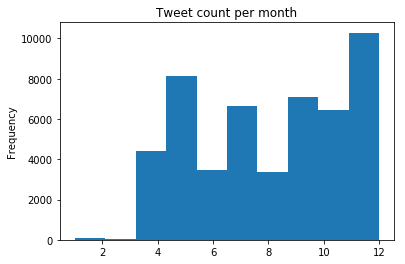

In [13]:
up_time= pd.DataFrame(columns=['year', 'month','date'])
up_time['date']=data['created_at']

up_months = pd.to_datetime(data['created_at'],format='%y-%M-%d %H:%M %p').apply(lambda x: x.month)
up_time['month']=up_months

up_year = pd.to_datetime(data['created_at'],format='%y-%M-%d %H:%M %p').apply(lambda x: x.year)
up_time['year']=up_year

up_months.plot(kind='hist', title='Tweet count per month')

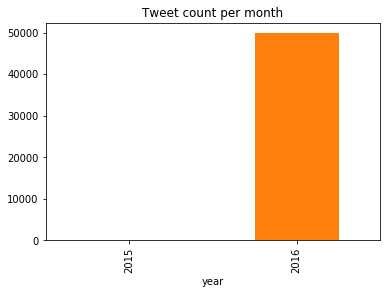

In [14]:
up_time.groupby('year')['date'].count().plot(kind='bar',title='Tweet count per month')

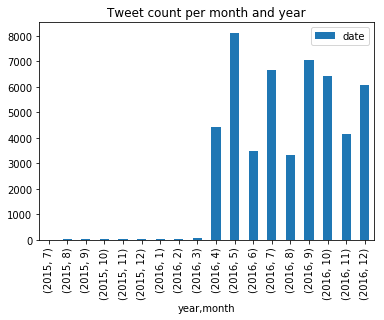

In [15]:
up_time.groupby(['year','month']).count().plot(kind='bar',title='Tweet count per month and year')

## Number of characters

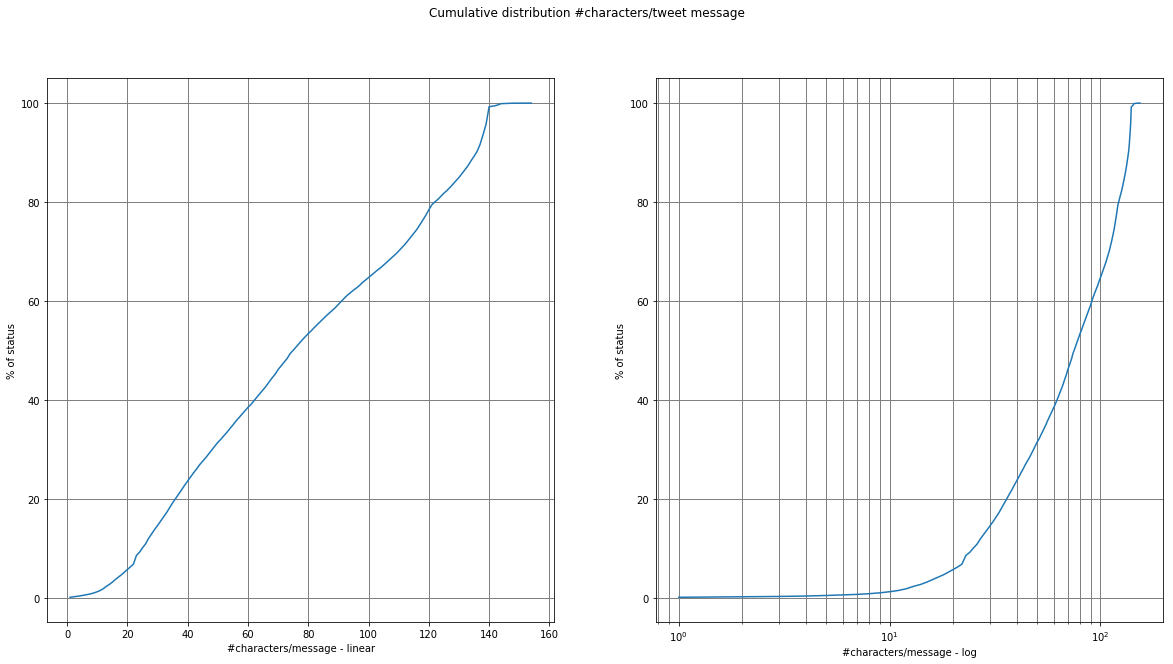

In [16]:
nb_characters = pd.DataFrame(data['text'].apply(lambda x : len(x)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.suptitle('Cumulative distribution #characters/tweet message')

ax1.plot(nb_characters.sort_values(by='text').reset_index().groupby('text').count().cumsum()*100/nb_characters.size)
ax1.set_xlabel('#characters/message - linear')
ax1.set_ylabel('% of status')
ax1.grid(color='grey', linestyle='-', linewidth=1, axis='both', which='both')

ax2.plot(nb_characters.sort_values(by='text').reset_index().groupby('text').count().cumsum()*100/nb_characters.size)
ax2.set_xscale('log')
ax2.set_xlabel('#characters/message - log')
ax2.set_ylabel('% of status')
ax2.grid(color='grey', linestyle='-', linewidth=1, axis='both', which='both')

## Number of users

In [17]:
print('number of users in the dataset: {}'.format(data['user_id'].unique().shape[0]))

number of users in the dataset: 4462


## Tweet frequency per user

In [18]:
tweet_freq= data.groupby(by='user_id').count()
tweet_freq=tweet_freq['_id']
tweet_freq=tweet_freq.reset_index().rename(columns={'_id': 'tweet count'})
#tweet_freq.sort_values(by='tweet count')

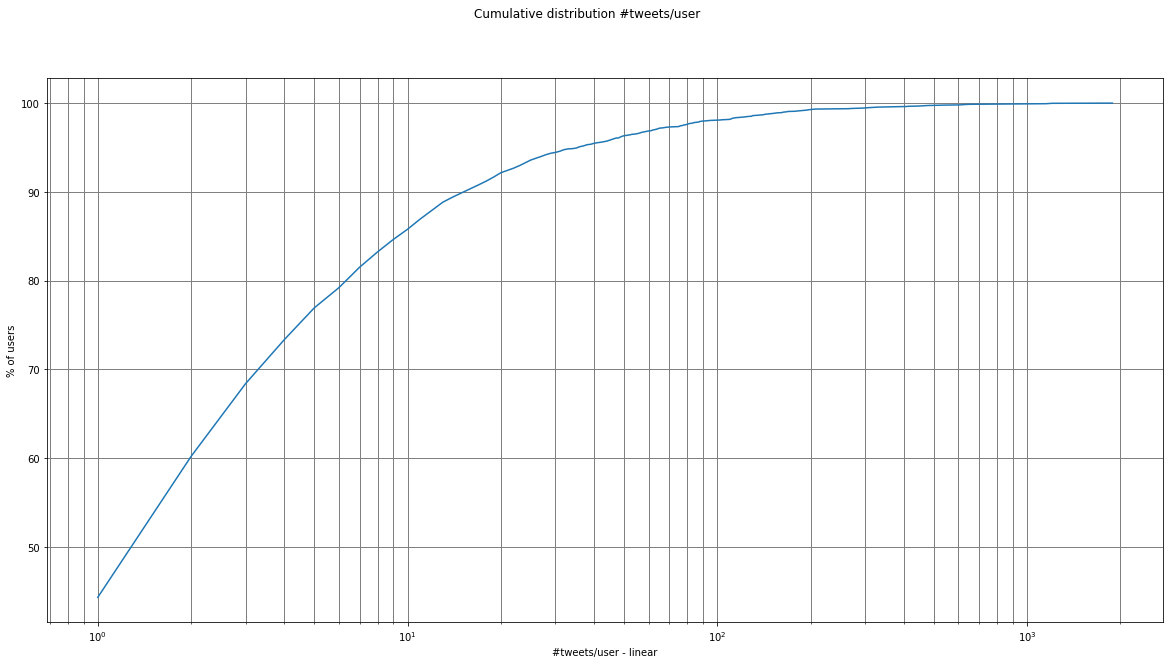

In [19]:
f, ax1 = plt.subplots(1, 1, figsize=(20,10))
f.suptitle('Cumulative distribution #tweets/user')

ax1.plot(pd.DataFrame(tweet_freq.sort_values(by='tweet count')).groupby('tweet count').count().cumsum()*100/tweet_freq.shape[0])
ax1.set_xlabel('#tweets/user - linear')
ax1.set_ylabel('% of users')
ax1.set_xscale('log')
ax1.grid(color='grey', linestyle='-', linewidth=1, axis='both', which='both')

# Finding groundtruth for local and unlocal users

### Hashtag frequently used by users with 1 tweets

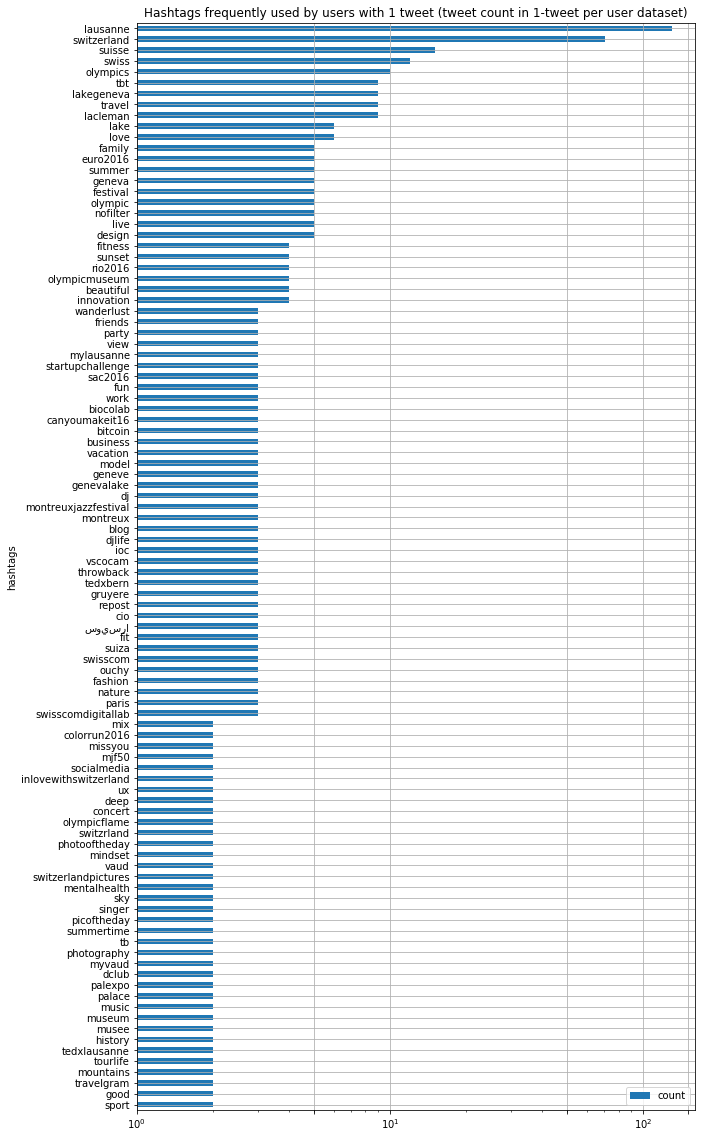

In [20]:
#recover user id with one tweet

users_1_tweet=tweet_freq[tweet_freq['tweet count']==1]['user_id']
data_1_tweet=data[[ x in list(users_1_tweet) for x in data['user_id']]]


def ComputeFrequentdHashtags(data):  
    #exclude tweet without hashtags
    nan_hashtags=data[~data['hashtags'].isnull()]
    associated_hashtags= list(nan_hashtags['hashtags'])
    associated_hashtags= reduce(operator.add, associated_hashtags)
    associated_hashtags= [x for x in associated_hashtags ]
    associated_hashtags= pd.concat([pd.DataFrame(associated_hashtags)])
    associated_hashtags['count']= pd.DataFrame(list(np.ones(len(associated_hashtags))))
    associated_hashtags = associated_hashtags.rename(columns={0:'hashtags'})
    associated_hashtags = associated_hashtags.groupby(by='hashtags').count().sort_values(by= 'count', ascending= True)#
    return associated_hashtags.iloc[::-1]

frequent_hashtag_1=ComputeFrequentdHashtags(data_1_tweet).head(100)
#frequent_hashtag_1=frequent_hashtag_1.reset_index()
frequent_hashtag_1[frequent_hashtag_1['count']>1].iloc[::-1].plot(kind='barh', figsize=(10,20), logx=True, grid=True, xticks=[1,5,10,50,100,150], title='Hashtags frequently used by users with 1 tweet (tweet count in 1-tweet per user dataset)')

### Hashtag frequently used by users with more tweets

/Users/valentine/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


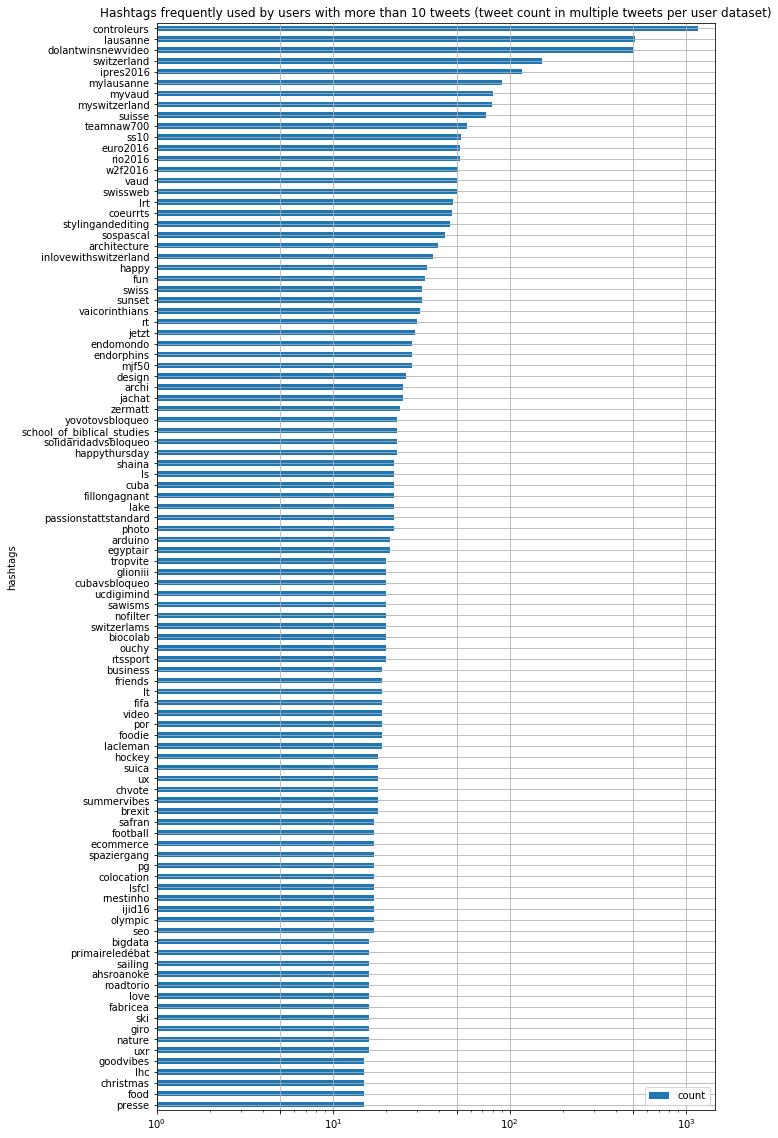

In [21]:
#recover user id with one tweet

users_multiple_tweet=tweet_freq[tweet_freq['tweet count'] > 10]['user_id']
data_multiple_tweet=data[[ x in list(users_multiple_tweet) for x in data['user_id']]]


def ComputeFrequentdHashtags(data):  
    #exclude tweet without hashtags
    nan_hashtags=data[~data['hashtags'].isnull()]
    associated_hashtags= list(nan_hashtags['hashtags'])
    associated_hashtags= reduce(operator.add, associated_hashtags)
    associated_hashtags= [x for x in associated_hashtags ]
    associated_hashtags= pd.concat([pd.DataFrame(associated_hashtags)])
    associated_hashtags['count']= pd.DataFrame(list(np.ones(len(associated_hashtags))))
    associated_hashtags = associated_hashtags.rename(columns={0:'hashtags'})
    associated_hashtags = associated_hashtags.groupby(by='hashtags').count().sort_values(by= 'count', ascending= True)
    return associated_hashtags.iloc[::-1]

frequent_hashtag_multiple=ComputeFrequentdHashtags(data_multiple_tweet)
#frequent_hashtag_multiple=frequent_hashtag_multiple.reset_index()
frequent_hashtag_multiple.head(100)[frequent_hashtag_multiple['count']>1].iloc[::-1].plot(kind='barh', figsize=(10,20), logx=True, grid=True, xticks=[1,5,10,50,100,500,1000],title='Hashtags frequently used by users with more than 10 tweets (tweet count in multiple tweets per user dataset)')

### Common hashtags for tweets of users with only one tweet / more than 10 tweets

In [22]:
# hashtag in the interesection 
def intersect(a, b):
    return list(set(a) & set(b))
intersect_ind=intersect(frequent_hashtag_1.index.values, frequent_hashtag_multiple.index.values)
print('Hashtags frequently used by both users with 1 tweet or more than 10 tweets (not relevant hashtags)')
intersect_ind

Hashtags frequently used by both users with 1 tweet or more than 10 tweets (not relevant hashtags)


['repost',
 'socialmedia',
 'concert',
 'innovation',
 'festival',
 'history',
 'photography',
 'party',
 'friends',
 'biocolab',
 'live',
 'model',
 'lausanne',
 'museum',
 'summertime',
 'paris',
 'view',
 'sky',
 'cio',
 'inlovewithswitzerland',
 'sac2016',
 'lakegeneva',
 'love',
 'olympics',
 'myvaud',
 'olympicflame',
 'travel',
 'nature',
 'mountains',
 'سويسرا',
 'ouchy',
 'dclub',
 'olympicmuseum',
 'suisse',
 'ioc',
 'fashion',
 'nofilter',
 'euro2016',
 'colorrun2016',
 'geneve',
 'vaud',
 'palexpo',
 'geneva',
 'tedxlausanne',
 'switzerland',
 'sport',
 'business',
 'photooftheday',
 'design',
 'montreux',
 'blog',
 'summer',
 'olympic',
 'throwback',
 'swisscom',
 'mylausanne',
 'rio2016',
 'beautiful',
 'music',
 'dj',
 'djlife',
 'switzerlandpictures',
 'fitness',
 'vacation',
 'sunset',
 'ux',
 'lacleman',
 'palace',
 'swiss',
 'tbt',
 'montreuxjazzfestival',
 'fun',
 'startupchallenge',
 'work',
 'lake',
 'mjf50',
 'family']

### Specific hashtags for tweets of users with more than 10 tweets

Try to find interesting hashtags that could serve as feature for local users. Example: #controleurs seems nice ;).

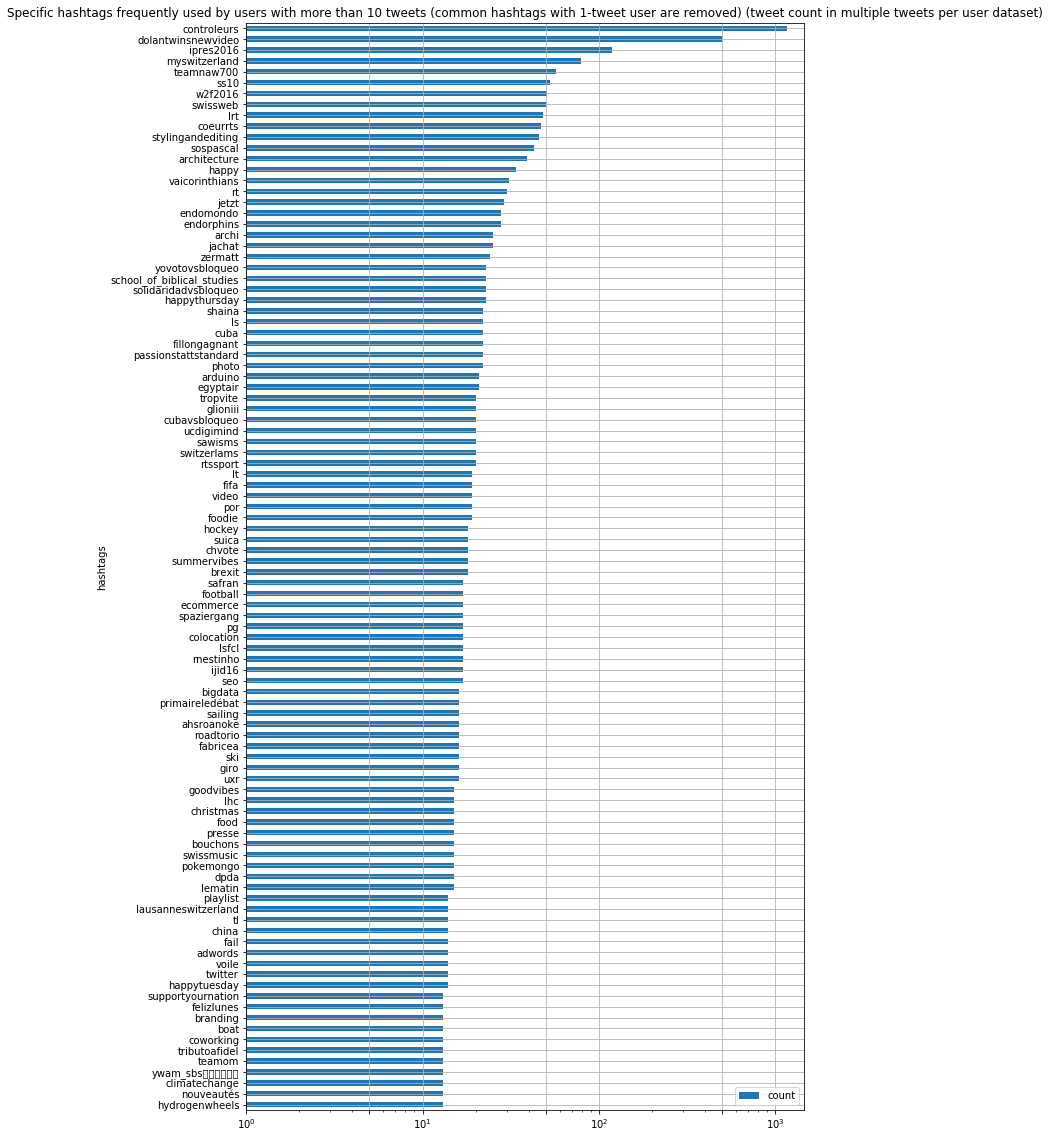

In [23]:
specific_to_multiple=frequent_hashtag_multiple[[x not in intersect_ind for x in frequent_hashtag_multiple.index.values]]
specific_to_multiple[specific_to_multiple['count']>1].iloc[::-1].tail(100).plot(kind='barh', figsize=(10,20),logx=True, grid=True, xticks=[1,5,10,50,100,500,1000],title='Specific hashtags frequently used by users with more than 10 tweets (common hashtags with 1-tweet user are removed) (tweet count in multiple tweets per user dataset)')

### Specific hashtags for tweets of users with 1 tweet

Try to find interesting hashtags that could serve as feature for unlocal users. Example: #olympics could refers to the Olympic museum of Lausanne that is a must-seen for tourists.

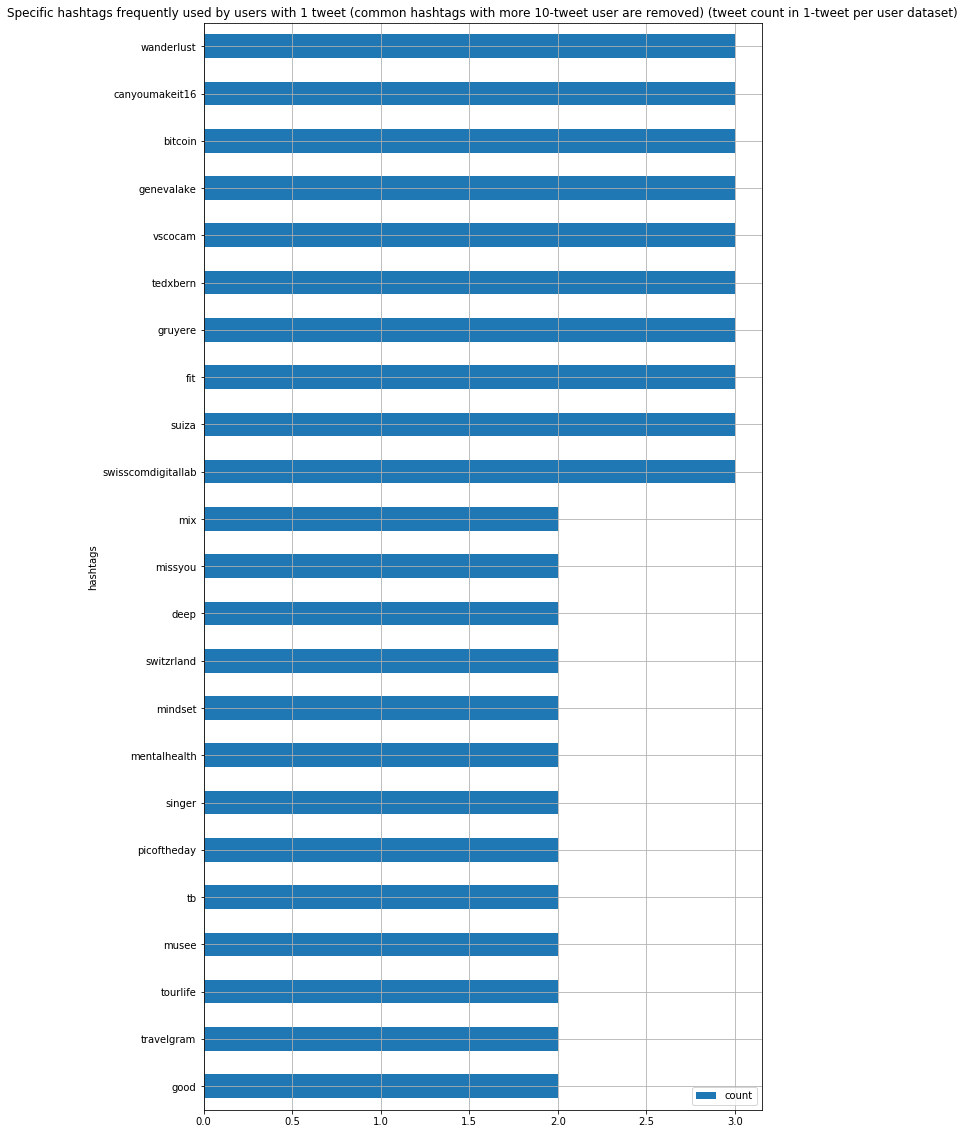

In [24]:
specific_to_1=frequent_hashtag_1[[x not in intersect_ind for x in frequent_hashtag_1.index.values]]
specific_to_1[specific_to_1['count']>1].iloc[::-1].plot(kind='barh', figsize=(10,20), grid=True, title='Specific hashtags frequently used by users with 1 tweet (common hashtags with more 10-tweet user are removed) (tweet count in 1-tweet per user dataset)')

## Features for unlocal: Find hashtags related to people visiting Lausanne

To establish a groundtruth of unlocal visitors, let's try to define a set of hashtags that could indicitate the user are currently visiting Lausanne.

In [25]:
#exclude tweet without hashtags
nan_hashtags=data[~data['hashtags'].isnull()]

#Return 100 hashtags most associated with main_hashtags in the dataset df  with the count of  each hashtags
# also
def ComputeAssociatedHashtags(data, main_hashtag):  
    #exclude tweet without hashtags
    nan_hashtags=data[~data['hashtags'].isnull()]
    #keep tweets with hashtag lausanne
    lausanne_hashtags=nan_hashtags[ [main_hashtag in x for x in list(nan_hashtags['hashtags'])] ]
    associated_hashtags= list(lausanne_hashtags['hashtags'])
    associated_hashtags= reduce(operator.add, associated_hashtags)
    associated_hashtags= [x for x in associated_hashtags if x!= main_hashtag]
    associated_hashtags= pd.concat([pd.DataFrame(associated_hashtags)])
    associated_hashtags['count']= pd.DataFrame(list(np.ones(len(associated_hashtags))))
    associated_hashtags = associated_hashtags.rename(columns={0:'hashtags'})
    associated_hashtags = associated_hashtags.groupby(by='hashtags').count().sort_values(by= 'count', ascending= True).tail(100)
    

    return associated_hashtags.iloc[::-1]

### \#visiting

number of tweets with #visiting: 1


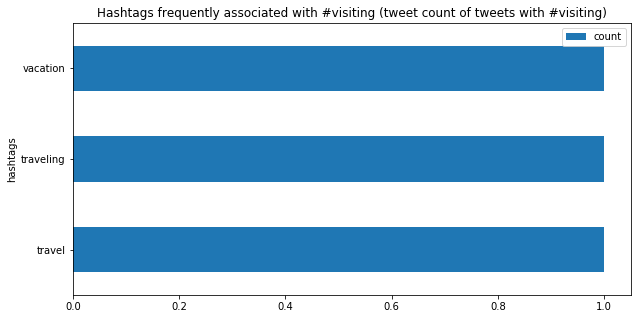

In [26]:
visiting_hashtags=nan_hashtags[ ['visiting' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #visiting: {}'.format(visiting_hashtags.shape[0]))
associated_visiting= ComputeAssociatedHashtags(data, 'visiting')
associated_visiting.iloc[::-1].plot(kind='barh', figsize=(10,5),title='Hashtags frequently associated with #visiting (tweet count of tweets with #visiting)')

### \#visit

number of tweets with #visit: 2


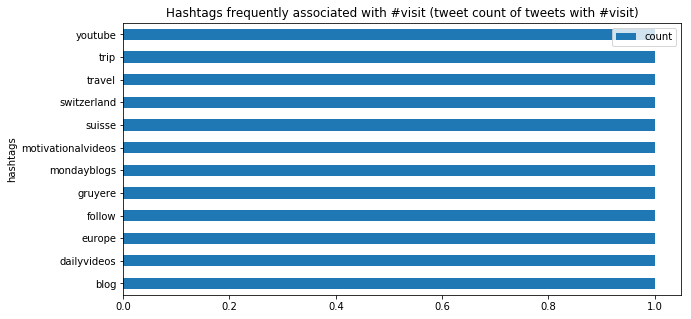

In [27]:
visit_hashtags=nan_hashtags[ ['visit' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #visit: {}'.format(visit_hashtags.shape[0]))
associated_visit= ComputeAssociatedHashtags(data, 'visit')
associated_visit.iloc[::-1].plot(kind='barh', figsize=(10,5),title='Hashtags frequently associated with #visit (tweet count of tweets with #visit)')

### \#tourism

number of tweets with #tourism: 3


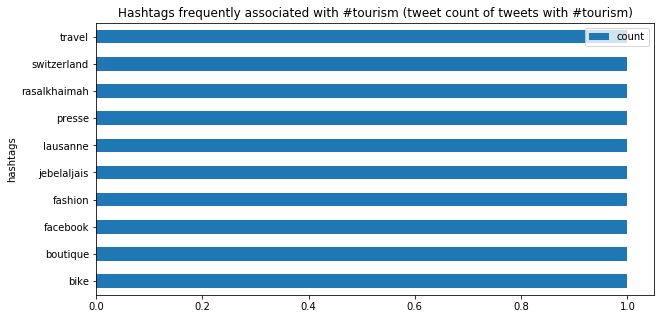

In [28]:
tourism_hashtags=nan_hashtags[ ['tourism' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #tourism: {}'.format(tourism_hashtags.shape[0]))
associated_tourism= ComputeAssociatedHashtags(data, 'tourism')
associated_tourism.iloc[::-1].plot(kind='barh', figsize=(10,5),title='Hashtags frequently associated with #tourism (tweet count of tweets with #tourism)')

### \#vacances (not sure we can use it, not a good feature for unlocal)

number of tweets with #vacances: 7


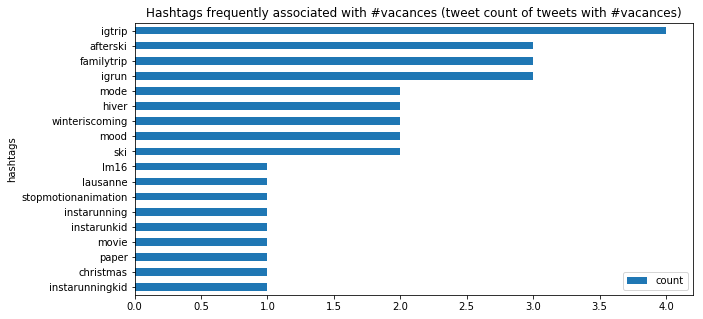

In [29]:
vacances_hashtags=nan_hashtags[ ['vacances' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #vacances: {}'.format(vacances_hashtags.shape[0]))
associated_vacances= ComputeAssociatedHashtags(data, 'vacances')
associated_vacances.iloc[::-1].plot(kind='barh', figsize=(10,5),title='Hashtags frequently associated with #vacances (tweet count of tweets with #vacances)')

### \#vacation (not sure we can use it, not a good feature for unlocal)

(4, 52)
number of tweets with #vacation: 4


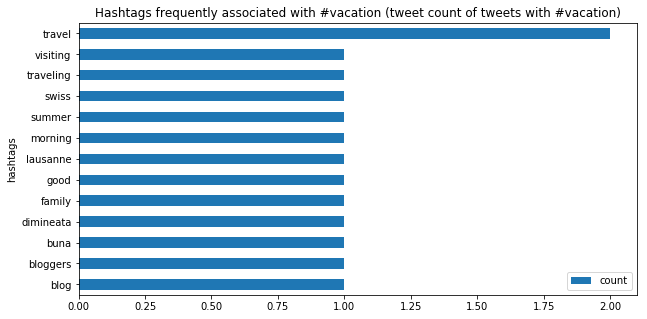

In [30]:
vacation_hashtags=nan_hashtags[ ['vacation' in x for x in list(nan_hashtags['hashtags'])] ]
print(vacation_hashtags.shape)
print('number of tweets with #vacation: {}'.format(vacation_hashtags.shape[0]))
associated_vacation= ComputeAssociatedHashtags(data, 'vacation')
associated_vacation.iloc[::-1].plot(kind='barh', figsize=(10,5), title='Hashtags frequently associated with #vacation (tweet count of tweets with #vacation)')

### \#holidays (not sure we can use it, not a good feature for unlocal)

number of tweets with #holidays: 3


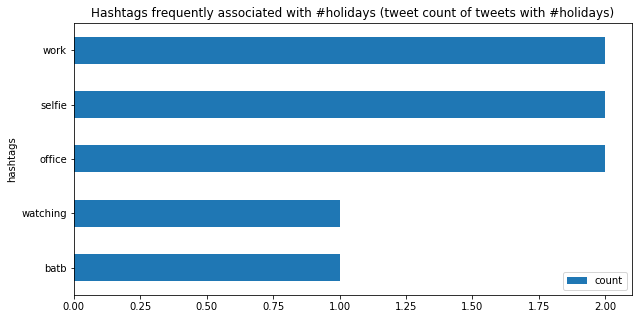

In [31]:
holydays_hashtags=nan_hashtags[ ['holidays' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #holidays: {}'.format(holydays_hashtags.shape[0]))
associated_holydays= ComputeAssociatedHashtags(data, 'holidays')
associated_holydays.iloc[::-1].plot(kind='barh', figsize=(10,5),title='Hashtags frequently associated with #holidays (tweet count of tweets with #holidays)')

### \#holiday (not sure we can use it, not a good feature for unlocal)

number of tweets with #holiday: 3


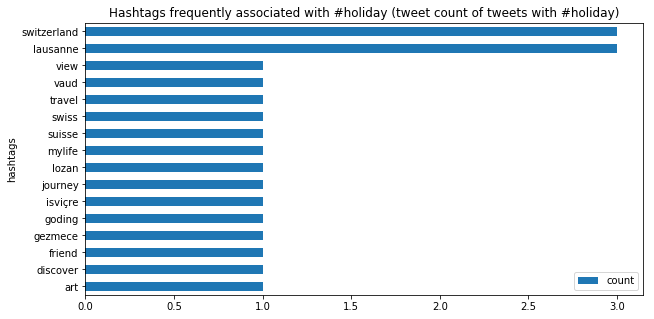

In [32]:
holyday_hashtags=nan_hashtags[ ['holiday' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #holiday: {}'.format(holyday_hashtags.shape[0]))
associated_holyday= ComputeAssociatedHashtags(data, 'holiday')
associated_holyday.iloc[::-1].plot(kind='barh', figsize=(10,5),title='Hashtags frequently associated with #holiday (tweet count of tweets with #holiday)')

### \#travel

number of tweets with #travel: 52


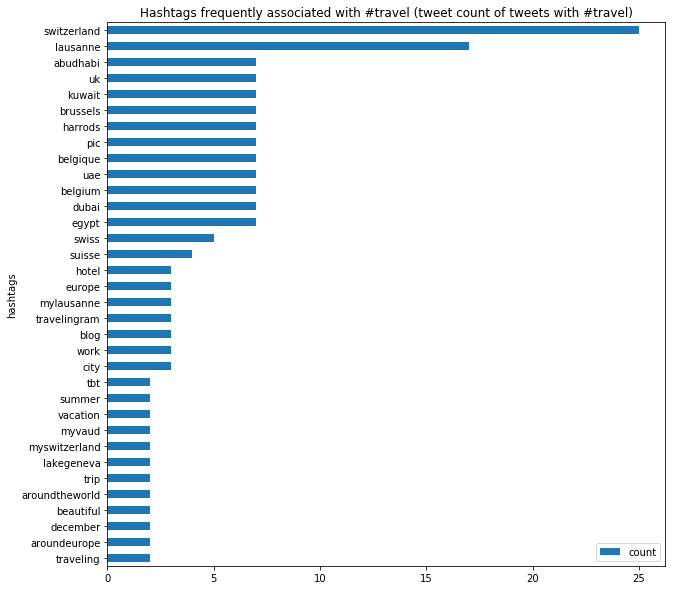

In [33]:
travel_hashtags=nan_hashtags[ ['travel' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #travel: {}'.format(travel_hashtags.shape[0]))
associated_travel= ComputeAssociatedHashtags(data, 'travel')
associated_travel[associated_travel['count'] > 1].iloc[::-1].plot(kind='barh', figsize=(10,10),title='Hashtags frequently associated with #travel (tweet count of tweets with #travel)')

### \#traveling

number of tweets with #traveling: 3


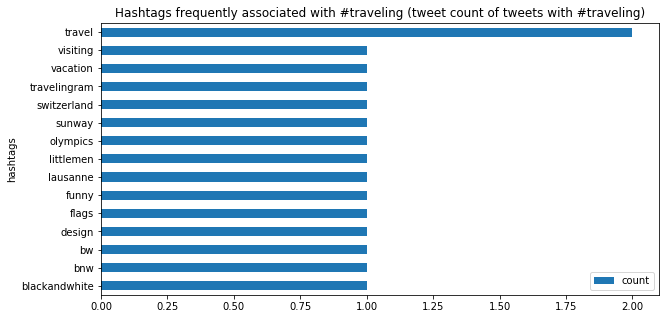

In [34]:
traveling_hashtags=nan_hashtags[ ['traveling' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #traveling: {}'.format(traveling_hashtags.shape[0]))
associated_traveling= ComputeAssociatedHashtags(data, 'traveling')
associated_traveling.iloc[::-1].plot(kind='barh', figsize=(10,5),title='Hashtags frequently associated with #traveling (tweet count of tweets with #traveling)')

### \#travelling

number of tweets with #travelling: 1


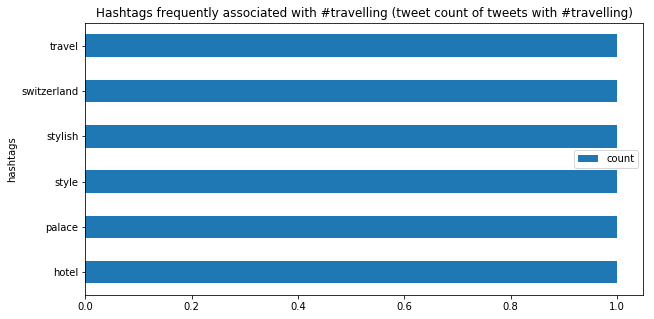

In [35]:
travelling_hashtags=nan_hashtags[ ['travelling' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #travelling: {}'.format(travelling_hashtags.shape[0]))
associated_travelling= ComputeAssociatedHashtags(data, 'travelling')
associated_travelling.iloc[::-1].plot(kind='barh', figsize=(10,5),title='Hashtags frequently associated with #travelling (tweet count of tweets with #travelling)')

### \#trip

number of tweets with #trip: 9


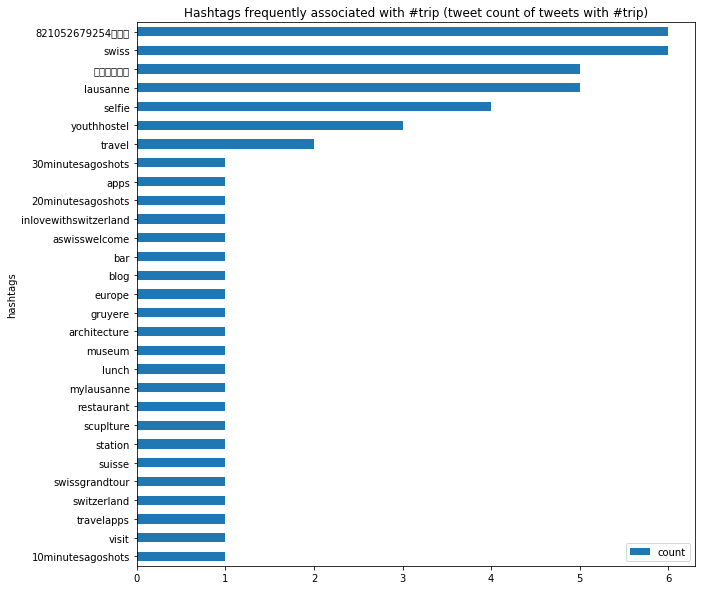

In [36]:
trip_hashtags=nan_hashtags[ ['trip' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #trip: {}'.format(trip_hashtags.shape[0]))
associated_trip= ComputeAssociatedHashtags(data, 'trip')
associated_trip.iloc[::-1].plot(kind='barh', figsize=(10,10),title='Hashtags frequently associated with #trip (tweet count of tweets with #trip)')

### \#hotel

number of tweets with #hotel: 20


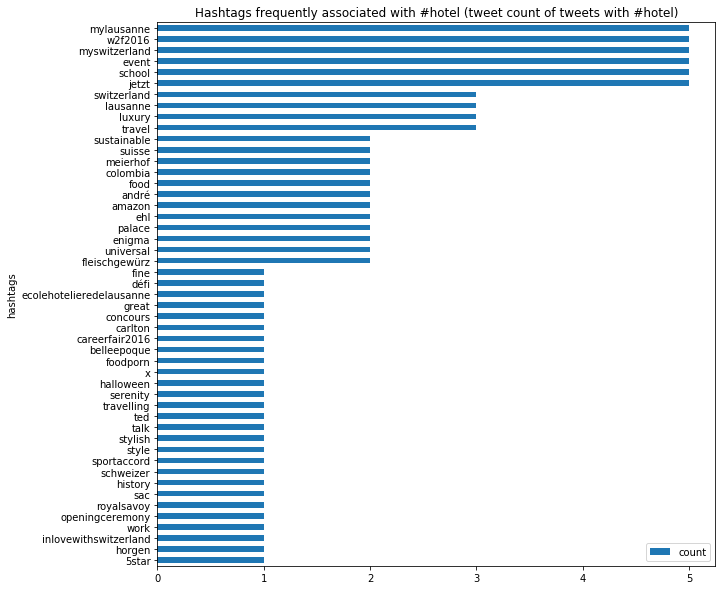

In [37]:
hotel_hashtags=nan_hashtags[ ['hotel' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #hotel: {}'.format(hotel_hashtags.shape[0]))
associated_hotel= ComputeAssociatedHashtags(data, 'hotel')
associated_hotel.iloc[::-1].plot(kind='barh', figsize=(10,10),title='Hashtags frequently associated with #hotel (tweet count of tweets with #hotel)')

### \#airbnb

number of tweets with #airbnb: 1


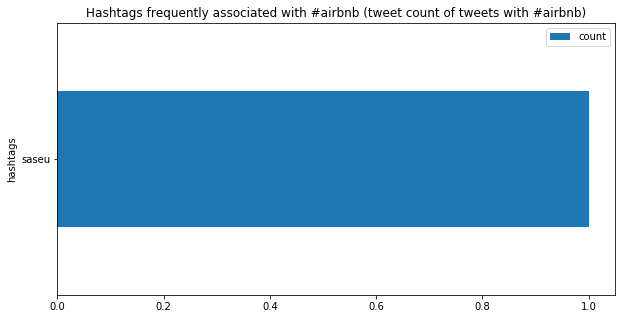

In [38]:
airbnb_hashtags=nan_hashtags[ ['airbnb' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #airbnb: {}'.format(airbnb_hashtags.shape[0]))
associated_airbnb= ComputeAssociatedHashtags(data, 'airbnb')
associated_airbnb.iloc[::-1].plot(kind='barh', figsize=(10,5), title='Hashtags frequently associated with #airbnb (tweet count of tweets with #airbnb)')

In [39]:
voyage_hashtags=nan_hashtags[ ['voyage' in x for x in list(nan_hashtags['hashtags'])] ]
print('number of tweets with #voyage: {}'.format(voyage_hashtags.shape[0]))
#associated_voyage= ComputeAssociatedHashtags(data, 'voyage')
#associated_voyage.iloc[::-1].plot(kind='barh', figsize=(10,5),title='Hashtags frequently associated with #voyage (tweet count of tweets with #voyage)')

number of tweets with #voyage: 0


### Count of those hashtags in the entire dataset


In [40]:
unlocal_hashtags=['visiting', 'visit', 'tourism', 'hotel', 'trip', 'traveling', 'travel']
unlocal_tweets=nan_hashtags[[intersect(x, unlocal_hashtags)!=[] for x in nan_hashtags['hashtags']]]
print('number of tweets with unlocal hashtags: {}'.format(unlocal_tweets.shape[0]))

number of tweets with unlocal hashtags: 80


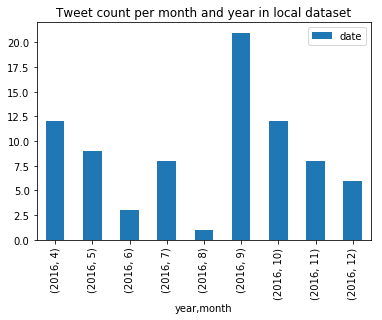

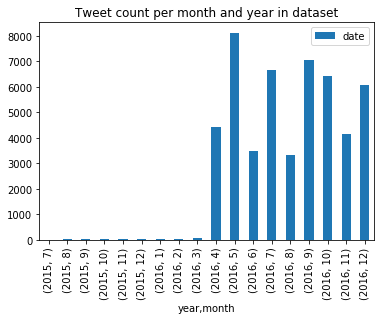

In [41]:
unlocal_up_time= pd.DataFrame(columns=['year', 'month','date'])
unlocal_up_time['date']=unlocal_tweets['created_at']

unlocal_up_months = pd.to_datetime(unlocal_tweets['created_at'],format='%y-%M-%d %H:%M %p').apply(lambda x: x.month)
unlocal_up_time['month']=unlocal_up_months

unlocal_up_year = pd.to_datetime(unlocal_tweets['created_at'],format='%y-%M-%d %H:%M %p').apply(lambda x: x.year)
unlocal_up_time['year']=unlocal_up_year

unlocal_up_time.groupby(['year','month']).count().plot(kind='bar',title='Tweet count per month and year in local dataset')
up_time.groupby(['year','month']).count().plot(kind='bar',title='Tweet count per month and year in dataset')

## Features for local: Tweets with user location set in Lausanne

In [42]:
print('number of tweets in dataset: {}'.format(data.shape[0]))
local_data = data[[('lausanne' in x)  if isinstance(x,str) else False for x in data['user_location'] ]]
print('number of tweets from users who set their location to Lausanne: {}'.format(local_data.shape[0]))

number of tweets in dataset: 50000
number of tweets from users who set their location to Lausanne: 18061


In [43]:
local_user=local_data['user_id'].map(lambda x: x['$numberLong'] if isinstance(x,dict) else x)
print('number of users in the dataset: {}'.format(data['user_id'].unique().shape[0]))
print('number of users with their location set to Lausanne: {}'.format(local_user.unique().shape[0]))

number of users in the dataset: 4462
number of users with their location set to Lausanne: 662


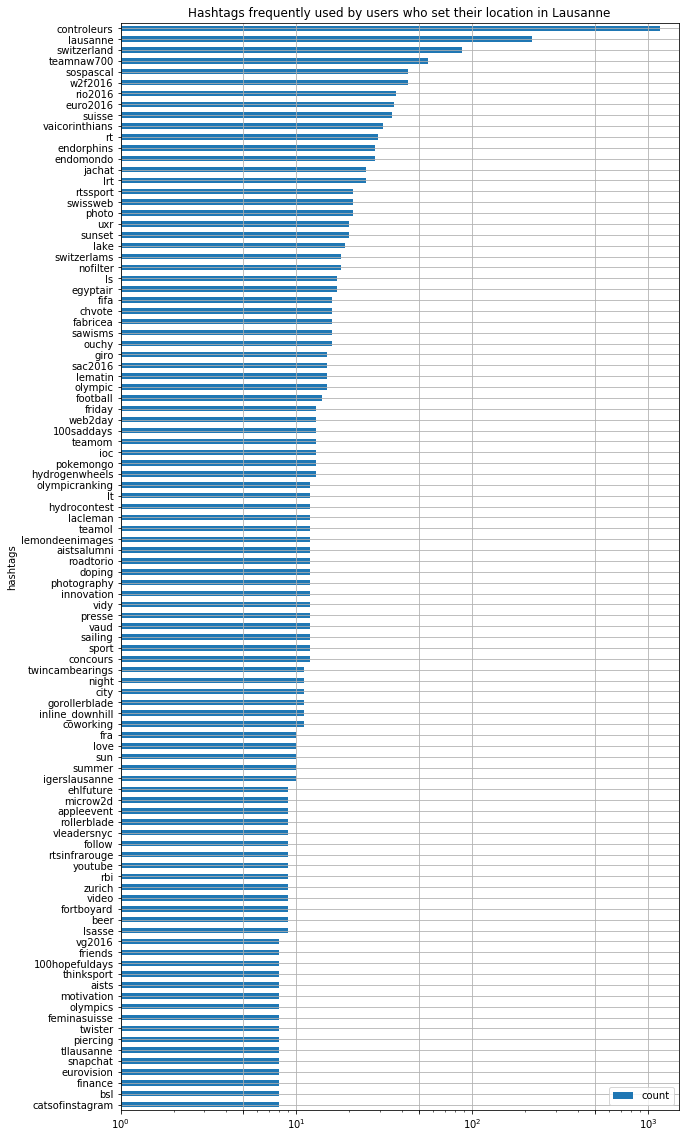

In [44]:
local_hashtags= ComputeFrequentdHashtags(data=local_data)
local_hashtags.iloc[::-1].tail(100).plot(kind='barh', figsize=(10,20),logx=True, grid=True, xticks=[1,5,10,50,100,500,1000] ,title='Hashtags frequently used by users who set their location in Lausanne')

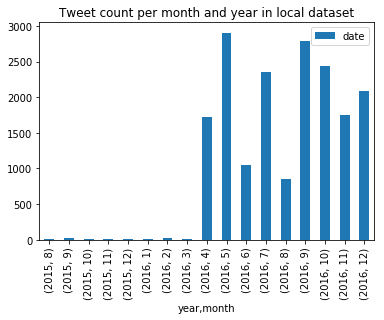

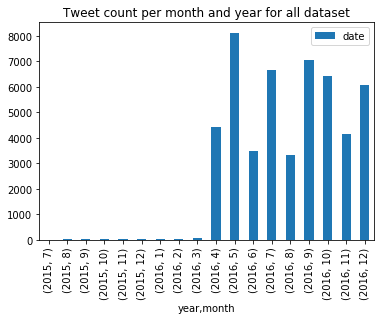

In [45]:
local_up_time= pd.DataFrame(columns=['year', 'month','date'])
local_up_time['date']=local_data['created_at']

local_up_months = pd.to_datetime(local_data['created_at'],format='%y-%M-%d %H:%M %p').apply(lambda x: x.month)
local_up_time['month']=local_up_months

local_up_year = pd.to_datetime(local_data['created_at'],format='%y-%M-%d %H:%M %p').apply(lambda x: x.year)
local_up_time['year']=local_up_year

local_up_time.groupby(['year','month']).count().plot(kind='bar',title='Tweet count per month and year in local dataset')
up_time.groupby(['year','month']).count().plot(kind='bar',title='Tweet count per month and year for all dataset')

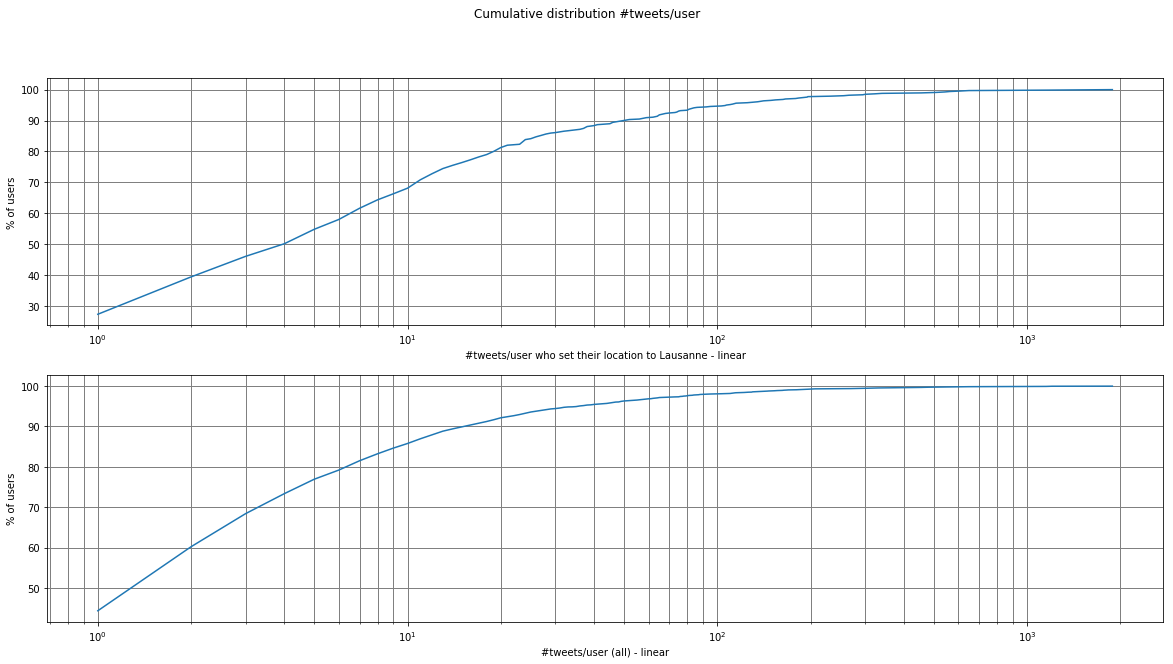

In [46]:
local_tweet_freq= local_data.groupby(by='user_id').count()
local_tweet_freq=local_tweet_freq['_id']
local_tweet_freq=local_tweet_freq.reset_index().rename(columns={'_id': 'tweet count'})


f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10))
f.suptitle('Cumulative distribution #tweets/user')

ax1.plot(pd.DataFrame(local_tweet_freq.sort_values(by='tweet count')).groupby('tweet count').count().cumsum()*100/local_tweet_freq.shape[0])
ax1.set_xlabel('#tweets/user who set their location to Lausanne - linear')
ax1.set_ylabel('% of users')
ax1.set_xscale('log')
ax1.grid(color='grey', linestyle='-', linewidth=1, axis='both', which='both')

ax2.plot(pd.DataFrame(tweet_freq.sort_values(by='tweet count')).groupby('tweet count').count().cumsum()*100/tweet_freq.shape[0])
ax2.set_xlabel('#tweets/user (all) - linear')
ax2.set_ylabel('% of users')
ax2.set_xscale('log')
ax2.grid(color='grey', linestyle='-', linewidth=1, axis='both', which='both')

## GROUNDTRUTH for locals

In [47]:
groundtruth_local=local_data[['tweet_id','hashtags','text', 'lang', 'user_lang', 'retweeted', 'quoted_status']]
groundtruth_local.head()

,tweet_id,hashtags,text,lang,user_lang,retweeted,quoted_status
8,55c272820a1776527f63ad53,[wakeupman],Hahahahahah Mike t'es un ouuuuf 😂😂😂😂😂 @mrfligh...,fr,fr,False,NaN
12,55c3bfea0a1776527f63df5b,NaN,@baboOu__ merciiiii beaucoup ! 😘😘❤️,fr,fr,False,NaN
13,55c5cf6f0a1776527f641ef3,NaN,Tu sais que ton père ne connaît rien à l'info ...,fr,fr,False,NaN
15,55c63c020a1776527f6430bd,NaN,J'ai envi de faire le Lucky Défi en vidéo ça v...,fr,fr,False,NaN
16,55c694b10a1776527f643f13,NaN,@Naif__acm @Eyaaaad @EH3H @nsr99nsr77 \n\nالصو...,ar,ar,False,NaN


In [48]:
nb_tweets_local = groundtruth_local.shape[0]
nb_tweets= data.shape[0]
groundtruth_local_per= nb_tweets_local*100/nb_tweets
print('Number of tweets in the local groundtruth: {} tweets'.format(nb_tweets_local))
print('Percentage of local grountruth tweet in the entire dataset {}%'.format(groundtruth_local_per))

Number of tweets in the local groundtruth: 18061 tweets
Percentage of local grountruth tweet in the entire dataset 36.122%


### Tweets with hashtags

In [49]:
nb_groundtruth_local_hashtags=len(groundtruth_local[~groundtruth_local['hashtags'].isnull()])
groundtruth_local_hashtags_per=round(nb_groundtruth_local_hashtags*100/nb_tweets_local)
print('Number of tweets  with hashtags in the local groundtruth: {} tweets'.format(nb_groundtruth_local_hashtags))
print('Percentage of local grountruth tweet with hashtags in the local groundtruth dataset {}%'.format(groundtruth_local_hashtags_per))

Number of tweets  with hashtags in the local groundtruth: 4470 tweets
Percentage of local grountruth tweet with hashtags in the local groundtruth dataset 25%


## Features for unlocal: Tweets with user location set in a know city or country that isn't Lausanne or Switzerland

First look at themost freuqnet user locations set on twitter

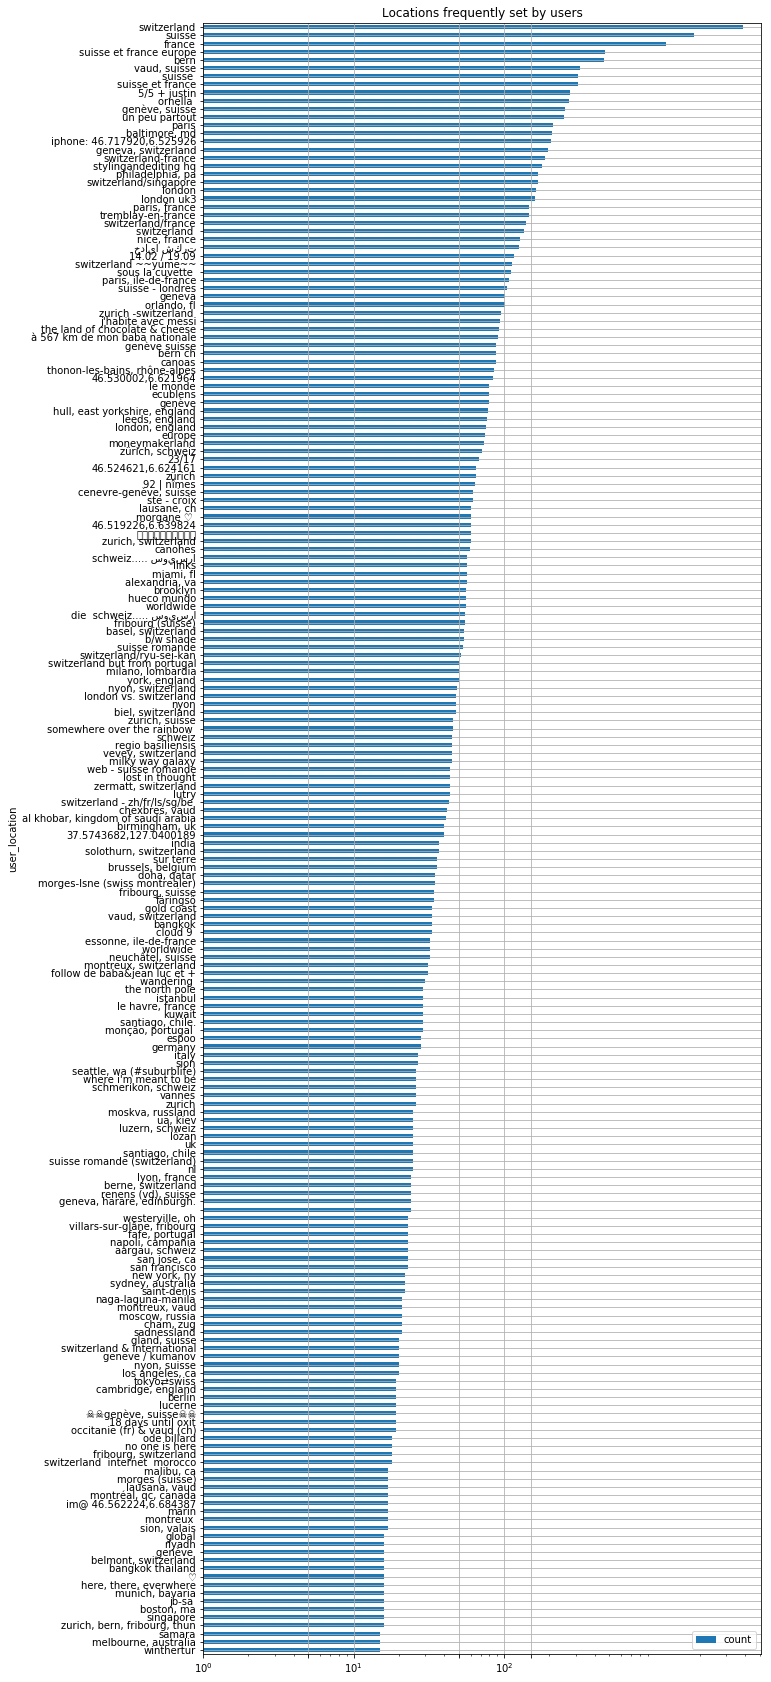

In [50]:

def ComputeFrequentdLocations(data):  
    nan_location=data[~data['user_location'].isnull()]
    not_lausanne_data = nan_location[[('lausanne' not in x )  if x != None else False for x in nan_location['user_location'] ]]
    user_location= list(not_lausanne_data['user_location'])
    user_location= pd.DataFrame(user_location)
    user_location['count']= pd.DataFrame(list(np.ones(len(user_location))))
    user_location = user_location.rename(columns={0:'user_location'})
    user_location = user_location.groupby(by='user_location').count().sort_values(by= 'count', ascending= True)#
    return user_location.iloc[::-1]

user_location =  ComputeFrequentdLocations(data).head(200)
user_location.iloc[::-1].plot(kind='barh', figsize=(10,30), logx=True, grid=True, xticks=[1,5,10,50,100,150], title='Locations frequently set by users')




In [51]:
locations = user_location.reset_index()['user_location']
unlocal_data= pd.DataFrame()

for i in locations.iteritems():
    unlocal_data = unlocal_data.append(data[[(i[1] == x)  if isinstance(x,str) else False for x in data['user_location'] ]])
    
unlocal_data.shape

(19542, 52)

In [52]:
list(user_location.reset_index()['user_location'])

['switzerland',
 'suisse',
 'france',
 'suisse et france europe',
 'bern',
 'vaud, suisse',
 'suisse ',
 'suisse et france',
 '5/5 + justin',
 'ornella ',
 'genève, suisse',
 'un peu partout',
 'paris',
 'baltimore, md',
 'iphone: 46.717920,6.525926',
 'geneva, switzerland',
 'switzerland-france',
 'stylingandediting hq',
 'philadelphia, pa',
 'switzerland/singapore',
 'london',
 'london uk3',
 'paris, france',
 'tremblay-en-france',
 'switzerland/france',
 'switzerland ',
 'nice, france',
 'خدايا شكرت',
 '14.02 / 19.09',
 'switzerland ~~yume~~',
 'sous la cuvette ',
 'paris, ile-de-france',
 'suisse - londres',
 'geneva',
 'orlando, fl',
 'zurich -switzerland ',
 "j'habite avec messi",
 'the land of chocolate & cheese',
 'à 567 km de mon baba nationale',
 'genève suisse',
 'bern ch',
 'canoas',
 'thonon-les-bains, rhône-alpes',
 '46.530002,6.621964',
 'le monde',
 'ecublens',
 'genève',
 'hull, east yorkshire, england',
 'leeds, england',
 'london, england',
 'europe',
 'moneymakerlan

In [53]:
first_locations =['switzerland',
 'suisse',
 'france',
 'suisse et france europe',
 'bern',
 'vaud, suisse',
 'suisse ',
 'suisse et france',
 'genève, suisse',
 'paris',
 'baltimore, md',
 'geneva, switzerland',
 'switzerland-france',
 'philadelphia, pa',
 'switzerland/singapore',
 'london',
 'london uk3',
 'paris, france',
 'tremblay-en-france',
 'switzerland/france',
 'switzerland ',
 'nice, france',
 'switzerland ~~yume~~',
 'paris, ile-de-france',
 'suisse - londres',
 'geneva',
 'orlando, fl',
 'zurich -switzerland ',
 'genève suisse',
 'bern ch',
 'canoas',
 'thonon-les-bains, rhône-alpes',
 'ecublens',
 'genève',
 'hull, east yorkshire, england',
 'leeds, england',
 'london, england',
 'europe',
 'zürich, schweiz',
 'zürich',
 '92 | nîmes',
 'cenevre-genève, suisse',
 'ste - croix',
 'lausane, ch',
 '木本花音ちゃんの地元',
 'zurich, switzerland',
 'canohes',
 'schweiz..... سويسرا',
 'miami, fl',
 'alexandria, va',
 'brooklyn',
 'hueco mundo',
 'die  schweiz..... سويسرا',
 'fribourg (suisse)',
 'basel, switzerland',
 'suisse romande',
 'switzerland/ryu-sei-kan',
 'switzerland but from portugal',
 'milano, lombardia',
 'york, england',
 'nyon, switzerland',
 'london vs. switzerland',
 'nyon',
 'biel, switzerland',
 'zurich, suisse',
 'schweiz',
 'vevey, switzerland',
 'web - suisse romande',
 'zermatt, switzerland',
 'lutry',
 'switzerland - zh/fr/ls/sg/be ',
 'chexbres, vaud',
 'al khobar, kingdom of saudi arabia',
 'birmingham, uk',
 'india',
 'solothurn, switzerland',
 'brussels, belgium',
 'doha, qatar',
 'morges-lsne (swiss montrealer)',
 'fribourg, suisse',
 'färingsö',
 'gold coast',
 'vaud, switzerland',
 'bangkok',
 'essonne, ile-de-france',
 'neuchâtel, suisse',
 'montreux, switzerland',
 'istanbul',
 'le havre, france',
 'santiago, chile.',
 'monção, portugal ',
 'espoo',
 'germany',
 'italy',
 'sion',
 'seattle, wa (#suburblife)',
 'schmerikon, schweiz',
 'vannes',
 'zurich',
 'moskva, russland',
 'ua, kiev',
 'luzern, schweiz',
 'lözan',
 'uk',
 'santiago, chile',
 'suisse romande (switzerland)',
 'nl',
 'lyon, france',
 'berne, switzerland',
 'renens (vd), suisse',
 'geneva, harare, edinburgh.',
 'westerville, oh',
 'villars-sur-glâne, fribourg',
 'fafe, portugal',
 'napoli, campania',
 'aargau, schweiz',
 'san jose, ca',
 'san francisco',
 'new york, ny',
 'sydney, australia',
 'saint-denis',
 'naga-laguna-manila',
 'montreux, vaud',
 'moscow, russia',
 'cham, zug',
 'sadnessland',
 'gland, suisse',
 'switzerland & international',
 'geneve / kumanov',
 'nyon, suisse',
 'los angeles, ca',
 'tokyo⇄swiss',
 'cambridge, england',
 'berlin',
 'lucerne',
 '☠☠genève, suisse☠☠',
 'occitanie (fr) & vaud (ch)',
 'fribourg, switzerland',
 'switzerland  internet  morocco',
 'malibu, ca',
 'morges (suisse)',
 'lausana, vaud',
 'montréal, qc, canada',
 'marin',
 'montreux ',
 'sion, valais',
 'riyadh',
 'genève ',
 'belmont, switzerland',
 'bangkok thailand',
 'munich, bavaria',
 'boston, ma',
 'singapore',
 'zurich, bern, fribourg, thun',
 'samara',
 'melbourne, australia',
 'winthertur']

In [54]:
unlocal_data= pd.DataFrame()

for i in first_locations:
    unlocal_data = unlocal_data.append(data[[(i == x)  if isinstance(x,str) else False for x in data['user_location'] ]])
    
unlocal_data.shape

(16450, 52)

## GROUNDTRUTH for unlocals

In [55]:
groundtruth_unlocal=unlocal_data[['tweet_id','hashtags','text', 'lang', 'user_lang', 'retweeted', 'quoted_status']]
groundtruth_unlocal.head()

,tweet_id,hashtags,text,lang,user_lang,retweeted,quoted_status
30,55edb84c0a177679d9051542,"[swissgrandtour, myswitzerland, sbb, cff, medi...",http://t.co/XBE7ckG8IH #swissgrandtour #myswit...,und,fr,False,NaN
79,561d2f7c0a17762825bdf303,NaN,"The Martian (@ Pathé Flon in Lausanne, VD) htt...",fr,en,False,NaN
84,562a37aa0a17762825c01194,[partytime],Can' wait for tomorrow ! #partytime @ D! Club ...,en,fr,False,NaN
88,562f9b1f0a17762825c10544,NaN,@FilippoFacci1 bellissimo !,it,en,False,NaN
137,565fe9ac0a17761347bad110,NaN,Hi @Harry_Styles Today is my birthday as well ...,en,en,False,NaN


In [56]:
nb_tweets_unlocal = groundtruth_unlocal.shape[0]
groundtruth_unlocal_per= nb_tweets_unlocal*100/nb_tweets
print('Number of tweets in the unlocal groundtruth: {} tweets'.format(nb_tweets_unlocal))
print('Percentage of unlocal grountruth tweet in the entire dataset {}%'.format(groundtruth_unlocal_per))

Number of tweets in the unlocal groundtruth: 16450 tweets
Percentage of unlocal grountruth tweet in the entire dataset 32.9%


### Tweets with hashtags

In [57]:
nb_groundtruth_unlocal_hashtags=len(groundtruth_unlocal[~groundtruth_unlocal['hashtags'].isnull()])
groundtruth_unlocal_hashtags_per=round(nb_groundtruth_unlocal_hashtags*100/nb_tweets_unlocal)
print('Number of tweets  with hashtags in the unlocal groundtruth: {} tweets'.format(nb_groundtruth_unlocal_hashtags))
print('Percentage of unlocal grountruth tweet with hashtags in the local groundtruth dataset {}%'.format(groundtruth_unlocal_hashtags_per))

Number of tweets  with hashtags in the unlocal groundtruth: 3915 tweets
Percentage of unlocal grountruth tweet with hashtags in the local groundtruth dataset 24%


## Test set

In [58]:
test_data= pd.DataFrame()
tweet_ids= list(groundtruth_local['tweet_id']) + list(groundtruth_unlocal['tweet_id'])
test_data= data[[x not in tweet_ids for x in data['tweet_id']]]

In [59]:
test_data=test_data[['tweet_id','hashtags','text', 'lang', 'user_lang', 'retweeted', 'quoted_status']]
test_data.head()

,tweet_id,hashtags,text,lang,user_lang,retweeted,quoted_status
0,55b932fd0a1776527f627ec2,NaN,Flemme de me préparer,fr,fr,False,NaN
1,55b9720c0a1776527f628c28,NaN,Trop hâte d'aller à Zurich,fr,fr,False,NaN
2,55b9730c0a1776527f628c3b,NaN,mais accidentellement il ajouta a cette mixtur...,fr,fr,False,NaN
3,55bbca590a1776527f62dacc,NaN,@sansplomb99 lui a payé en effet 😁,fr,fr,False,NaN
4,55bc9c8e0a1776527f62ee4a,NaN,Holaaa Argentinaa!! Ya terminó la clase y estu...,es,fr,False,"{'contributors': None, 'truncated': False, 'te..."


In [60]:
nb_tweets_test = test_data.shape[0]
test_per= nb_tweets_test*100/nb_tweets
print('Number of tweets in the test dataset: {} tweets'.format(nb_tweets_test))
print('Percentage of test tweet in the entire dataset {}%'.format(test_per))

Number of tweets in the test dataset: 15489 tweets
Percentage of test tweet in the entire dataset 30.978%


In [61]:
nb_tweets == nb_tweets_test + nb_tweets_local + nb_tweets_unlocal #check

True

### Tweets with hashtags 

In [62]:
nb_test_hashtags=len(test_data[~test_data['hashtags'].isnull()])
test_hashtags_per=round(nb_test_hashtags*100/nb_tweets_test)
print('Number of tweets  with hashtags in the test set: {} tweets'.format(nb_test_hashtags))
print('Percentage of test tweet with hashtags in the test set dataset {}%'.format(test_hashtags_per))

Number of tweets  with hashtags in the test set: 3602 tweets
Percentage of test tweet with hashtags in the test set dataset 23%


## Classify hashtags

First look at how much hashtags 

In [63]:
no_hashtag = data['hashtags'].isnull().sum()
with_hashtag = data.shape[0]-data['hashtags'].isnull().sum()

print('Number of tweets without hashtags: {}'.format(no_hashtag))
print('Number of tweets with hashtags: {}'.format(with_hashtag))
print('Proportion of tweets without hashtags: {} %'.format(no_hashtag*100/data.shape[0]))
print('Proportion of tweets with hashtags: {} %'.format(with_hashtag*100/data.shape[0]))

Number of tweets without hashtags: 38013
Number of tweets with hashtags: 11987
Proportion of tweets without hashtags: 76.026 %
Proportion of tweets with hashtags: 23.974 %


Recover all hashtags

In [64]:
all_hashtags=ComputeFrequentdHashtags(data)

In [65]:
all_hashtags.head()

,count
hashtags,
controleurs,1163
lausanne,1061
dolantwinsnewvideo,501
switzerland,455
suisse,156


### Word2Vec

In [66]:
import gensim 
from gensim.models import Word2Vec

word2vec_path = "wordvec/GoogleNews-vectors-negative300.bin"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)


word = pd.Series(all_hashtags.index.values)
#keep hashtags in word2vec
word=word[word.apply(lambda x : x in word2vec)]

print('Number of hashtags: {}'.format(all_hashtags.shape[0]))
print('Number of hashtags in word2vec: {}'.format(len(word)))
print('Proportion of hashtags in word2vec: {}%'.format(np.round(len(word)*100/all_hashtags.shape[0])))

ModuleNotFoundError: No module named 'gensim'

In [ ]:
def word2vector(word):
    return np.array(word2vec[word])

vec= word.apply(word2vector)
word2vec_df= pd.DataFrame([word,vec]).transpose()
word2vec_df= word2vec_df.rename(columns={0:'word', 1: 'vector'})
word2vec_df.head()

In [ ]:
vec_matrix=vec.apply(pd.Series).as_matrix()

In [ ]:
from sklearn.cluster import KMeans
K = 10
kmean= KMeans(n_clusters=K).fit(vec_matrix)
labels_w2v= kmean.labels_


word2vec_df['cluster']= labels_w2v
word2vec_df['count']= word2vec_df['word'].apply(lambda x: all_hashtags['count'][x])
word2vec_df.head()

word2vec_df=word2vec_df.sort_values(by=['cluster', 'count'], ascending=[True, False])
word2vec_df.head()

distrib=[]
for name, group in word2vec_df.groupby(by='cluster'):
    print('Cluster {}: '.format(name))
    count_words=group['count'].sum() 
    distrib= distrib + list(group['count'].apply(lambda x: x/count_words))
    print(group['word'][1:10])
word2vec_df['distrib']= distrib

## Does the first 100 hashtags define the majority of the tweets ? 

In [ ]:
#new df of weets id per hashtag

tweet_hashtags=pd.DataFrame(columns=['tweet_id', 'hashtags'])
#exclude tweet without hashtags
nan_hashtags=data[~data['hashtags'].isnull()]

df=nan_hashtags[['tweet_id', 'hashtags']]

for x in nan_hashtags.index.values:
    tweet_hashtags= tweet_hashtags.append(pd.DataFrame({'tweet_id':[df['tweet_id'][x] for number in range(len(df['hashtags'][x]))], 'hashtags':df['hashtags'][x]}), ignore_index=True)
    
tweet_hashtags.head()


In [ ]:
hashtag_tweets=pd.DataFrame(columns=['hashtags', 'tweet_ids'])

for name, group in tweet_hashtags.groupby('hashtags'):
    tweet_ids=list(group['tweet_id'])
    hahstag= name
    hashtag_tweets=hashtag_tweets.append(pd.DataFrame({'hashtags':name, 'tweet_ids': [tweet_ids]}))

print(hashtag_tweets.shape)
hashtag_tweets.head()
    
    
    
    

In [ ]:
hashtag_tweets= hashtag_tweets.merge(all_hashtags.reset_index(), how='inner', left_on='hashtags',right_on='hashtags')
print(hashtag_tweets.shape)
hashtag_tweets=hashtag_tweets.sort_values(by='count', ascending=False).reset_index()
hashtag_tweets.reset_index().head(20)

In [ ]:

tweet_ids=[]
x=[]
for i, ids in enumerate(hashtag_tweets['tweet_ids']):
    if i == 0 :
        x=x+ids
        tweet_ids =tweet_ids + [len(x)]
    else :
        x=x+ids
        x_series=pd.Series(x).drop_duplicates()
        x_list=list(x_series)
        tweet_ids= tweet_ids +  [len(x_list)]

    

In [ ]:
plt.plot(tweet_ids) 

## LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
import string

nan_hashtags=data[~data['hashtags'].isnull()]
nan_hashtags['hashtags']= nan_hashtags['hashtags'].apply(lambda x: ' '.join(x))
nan_hashtags=nan_hashtags[['tweet_id','hashtags','text', 'lang', 'user_lang', 'retweeted', 'quoted_status']]
nan_hashtags.head()

In [ ]:
# compute lda model, tf, topics-words dataset, words-indices map
def LDA(tf, tf_feature_names, n_components,n_top_words):
    
    lda_ = LatentDirichletAllocation(n_components=n_components, max_iter=5,learning_method='online',learning_offset=50.,random_state=0)

    lda_.fit(tf)
    
    topics_dataset=pd.DataFrame(columns=['Topic ID', 'Words'])
    for topic_idx, topic in enumerate(lda_.components_):
        topic_id= topic_idx
        words=[tf_feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics_dataset= topics_dataset.append(pd.DataFrame([[topic_id, words ]],columns=['Topic ID', 'Words']))
    
    return lda_, topics_dataset

n_components =  8 # number of topics
n_top_words = 20 # first X words in that topics
n_features = 10000

my_stop_words = text.ENGLISH_STOP_WORDS.union(string.punctuation)
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,stop_words=set(my_stop_words)
                                , analyzer='word') 
tf = tf_vectorizer.fit_transform(nan_hashtags['hashtags'])
tf_feature_names = tf_vectorizer.get_feature_names()


lda_, topics_words=LDA(tf, tf_feature_names, n_components,n_top_words)

for topic in topics_words.iterrows():
    print('Topic {}'.format(topic[1]['Topic ID']))
    print(topic[1]['Words'])

In [ ]:
res=lda_.transform(tf).tolist()
nan_hashtags['topic distribution']=res
#nan_hashtags['dominant topics']=nan_hashtags['topic distribution'].apply(lambda x: np.argwhere(x == np.amax(x))[0][0] if len(np.argwhere(x == np.amax(x))) != len(x) else np.nan)

#print('Percentage of tweets (with hashtags) with no dominant topics {} %'.format(len(nan_hashtags['dominant topics'][nan_hashtags['dominant topics'].isnull() ])*100/len(nan_hashtags['hashtags'])))
nan_hashtags.head()

In [ ]:
res

In [ ]:
n_components

In [ ]:
for i in range(n_components):
    nan_hashtags['Hashtag topic {}'.format(i)]= [res[j][i] for j in range(len(res))]
    
nan_hashtags=nan_hashtags.drop(['topic distribution'], axis =1)
nan_hashtags.head()

## Save groundtruth and test

In [ ]:
groundtruth_local['label']= 1
groundtruth_unlocal['label']= 0
groundtruth= groundtruth_local.append(groundtruth_unlocal)

print('groundtruth_local shape: {}'.format(groundtruth_local.shape))
print('groundtruth_unlocal shape: {}'.format(groundtruth_unlocal.shape))
print('groundtruth shape: {}'.format(groundtruth.shape))


groundtruth=pd.concat([groundtruth, nan_hashtags], axis=0, join='outer')

frequent_user_lang=ComputeFrequentUserLang(groundtruth)
five_frequent_user_lang = frequent_user_lang.reset_index().head()
for i in five_frequent_user_lang['user_lang']:
    groundtruth['user_lang_{}'.format(i)]= groundtruth['user_lang']==i
    
frequent_lang=ComputeFrequentTweetLang(groundtruth)
five_frequent_lang = frequent_lang.reset_index().head()
for i in five_frequent_lang['lang']:
    groundtruth['lang_{}'.format(i)]= groundtruth['lang']==i

groundtruth['other lang']= [x not in five_frequent_lang['lang'] for x in groundtruth['lang']]
groundtruth.head()

groundtruth['other user lang']= [x not in five_frequent_user_lang['user_lang'] for x in groundtruth['user_lang']]
groundtruth.head()


In [ ]:
groundtruth.to_csv('data/groundtruth_hashtags_lang.csv')

In [ ]:
test=pd.concat([test_data, nan_hashtags], axis=0, join='outer')

frequent_user_lang=ComputeFrequentUserLang(test)
five_frequent_user_lang = frequent_user_lang.reset_index().head()
for i in five_frequent_user_lang['user_lang']:
    test['user_lang_{}'.format(i)]= test['user_lang']==i
    
frequent_lang=ComputeFrequentTweetLang(test)
five_frequent_lang = frequent_lang.reset_index().head()
for i in five_frequent_lang['lang']:
    test['lang_{}'.format(i)]= test['lang']==i

test['other lang']= [x not in five_frequent_lang['lang'] for x in test['lang']]
test.head()

test['other user lang']= [x not in five_frequent_user_lang['user_lang'] for x in test['user_lang']]
test.head()

In [ ]:
test.to_csv('data/test_hashtags_lang.csv')

# Coordinates 

why is there some data without coordinates when it's tweet geolocalized in Lausanne ?

In [54]:
unlocalized_data= data[data['coordinates'].isnull()]
print('Number of total tweets {}'.format(data.shape[0]))
print('Number of unlocalized tweets {}'.format(unlocalized_data.shape[0]))
print('Number of localized tweets {}'.format(data.shape[0] - unlocalized_data.shape[0]))

Number of total tweets 50000
Number of unlocalized tweets 43375
Number of localized tweets 6625


In [55]:
import folium

#create and display map (centered on Lausanne) of tweets
#df : tweets dataset, with
#popup_col: column values to show on popup, color_hx: hexadecimal color code for the tweet markers
#function already filter tweets to plot those with coordinates
def tweetMap(df,popup_col,color_hx):
    localized_data= df[~df['coordinates'].isnull()]
    localized_data['coordinates']= localized_data['coordinates'].map(lambda x: x['coordinates'])
    map_lausanne = folium.Map(location=[46.533340, 6.623380], zoom_start=12)
    localized_data.apply(lambda x: folium.CircleMarker([x['coordinates'][1],x['coordinates'][0]],radius=5,color=color_hx, fill_color=color_hx, fill=True, fill_opacity=0.7, popup=folium.Popup(x[popup_col], parse_html=True)).add_to(map_lausanne), axis =1 )
    return map_lausanne
    
map_lausanne = tweetMap(data[1:2000], 'text','#ff0000')
map_lausanne

ImportError: No module named 'folium'

## Hashtags associated with \#lausanne
Filter by #lausanne  and Compute the hashtags associated with \#lausanne

In [ ]:
associated_lausanne= ComputeAssociatedHashtags(data, 'lausanne')
associated_lausanne.iloc[::-1].plot(kind='barh', figsize=(10,20),logx=True, grid=True, xticks=[1,5,10,50,100,150,200], title='Hashtags frequently associated with #lausanne (tweet count of tweets with #lausanne)')

# Retweet

In [ ]:
data[data['retweet_count']==0]
#print(data['retweet_count'])

In [ ]:
local_data['user_id'].unique()